# Séries temporais

## Tipos de data e ferramentas para data e hora

In [1]:
from datetime import datetime

import pandas as pd
import numpy as np

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2022, 9, 18, 7, 56, 52, 351631)

In [4]:
now.year, now.month, now.day

(2022, 9, 18)

In [5]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)

delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta

In [9]:
start = datetime(2011,1,7)

start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Conversão entre string e datetime

In [11]:
stamp = datetime(2011,1,31)

str(stamp)

'2011-01-31 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-31'

In [13]:
stamp.strftime('%m-%d-%Y')

'01-31-2011'

In [14]:
value = '2011-01-03'

datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datetime.strptime(value,'%Y-%d-%m')

datetime.datetime(2011, 3, 1, 0, 0)

In [16]:
datastrs = ['7/6/2011','8/6/2011']

[datetime.strptime(x, '%m/%d/%Y') for x in datastrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [17]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [19]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [20]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [21]:
idx = pd.to_datetime(datestrs + [None])

idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
idx[2]

NaT

In [23]:
pd.isnull(idx)

array([False, False,  True])

## Básico sobre séries temporais

In [24]:
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011,1,7), datetime(2011,1,8), datetime(2011,1,10), datetime(2011,1,12)]

ts = pd.Series(np.random.randn(6), index=dates)

ts

2011-01-02   -0.294140
2011-01-05    1.466599
2011-01-07   -0.444075
2011-01-08   -0.260220
2011-01-10    0.201981
2011-01-12    0.001061
dtype: float64

In [25]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [26]:
ts + ts[::2]

2011-01-02   -0.588280
2011-01-05         NaN
2011-01-07   -0.888150
2011-01-08         NaN
2011-01-10    0.403961
2011-01-12         NaN
dtype: float64

In [27]:
ts.index.dtype

dtype('<M8[ns]')

In [28]:
stamp = ts.index[0]

stamp

Timestamp('2011-01-02 00:00:00')

### Indexação, seleção e geração de subconjuntos

In [29]:
stamp = ts.index[2]

ts[stamp]

-0.44407510046866

In [30]:
ts['1/10/2011']

0.20198059300871554

In [31]:
ts['20110110']

0.20198059300871554

In [32]:
longer_ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))

longer_ts

2000-01-01    1.181914
2000-01-02   -0.112540
2000-01-03    2.020633
2000-01-04    2.055162
2000-01-05    0.243059
                ...   
2002-09-22    0.439533
2002-09-23    0.424785
2002-09-24    0.240511
2002-09-25    0.136075
2002-09-26    0.210820
Freq: D, Length: 1000, dtype: float64

In [33]:
longer_ts['2001']

2001-01-01    0.994270
2001-01-02    0.815054
2001-01-03   -0.124177
2001-01-04    1.733146
2001-01-05    0.313468
                ...   
2001-12-27    0.779604
2001-12-28   -0.149285
2001-12-29   -0.818008
2001-12-30    0.083505
2001-12-31   -0.260756
Freq: D, Length: 365, dtype: float64

In [34]:
longer_ts['2001-05']

2001-05-01   -0.136629
2001-05-02   -0.136807
2001-05-03    0.444449
2001-05-04    0.190124
2001-05-05    0.009307
2001-05-06   -0.148266
2001-05-07    0.509456
2001-05-08    0.166819
2001-05-09    0.319767
2001-05-10   -0.763818
2001-05-11    0.827736
2001-05-12    0.923322
2001-05-13   -1.795253
2001-05-14    2.134936
2001-05-15    0.279522
2001-05-16    1.240332
2001-05-17   -0.298314
2001-05-18    0.905962
2001-05-19    0.477910
2001-05-20    0.230987
2001-05-21    0.022199
2001-05-22    0.975105
2001-05-23   -1.311008
2001-05-24   -0.839378
2001-05-25   -1.497696
2001-05-26   -0.937924
2001-05-27    0.032165
2001-05-28   -0.618331
2001-05-29    0.135474
2001-05-30   -0.712859
2001-05-31   -0.500017
Freq: D, dtype: float64

In [35]:
ts[datetime(2011,1,7):]

2011-01-07   -0.444075
2011-01-08   -0.260220
2011-01-10    0.201981
2011-01-12    0.001061
dtype: float64

In [36]:
ts

2011-01-02   -0.294140
2011-01-05    1.466599
2011-01-07   -0.444075
2011-01-08   -0.260220
2011-01-10    0.201981
2011-01-12    0.001061
dtype: float64

In [37]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.444075
2011-01-08   -0.260220
2011-01-10    0.201981
dtype: float64

In [38]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.294140
2011-01-05    1.466599
2011-01-07   -0.444075
2011-01-08   -0.260220
dtype: float64

In [39]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100,4),index=dates,columns=['Colorado','Texas','New York','Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.269874,0.305861,0.621838,-0.286145
2001-05-09,0.673984,0.515635,1.876518,0.323838
2001-05-16,-2.395371,-0.228613,0.530487,0.513208
2001-05-23,0.106232,0.114137,-0.569927,-0.778025
2001-05-30,-0.652304,0.457094,0.417975,-1.449754


### Séries temporais com índices duplicados

In [40]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])

dup_ts = pd.Series(np.arange(5), index=dates)

dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [41]:
dup_ts.index.is_unique

False

In [42]:
dup_ts['1/3/2000'] # não duplicado

4

In [43]:
dup_ts['1/2/2000'] # duplicado

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [44]:
grouped = dup_ts.groupby(level=0)

grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [45]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Intervalos de datas, frequências e deslocamentos

In [46]:
ts

2011-01-02   -0.294140
2011-01-05    1.466599
2011-01-07   -0.444075
2011-01-08   -0.260220
2011-01-10    0.201981
2011-01-12    0.001061
dtype: float64

In [47]:
resampler = ts.resample('D')

resampler

### Gerando intervalos de datas

In [48]:
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [49]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [52]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [53]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequências e offset de datas

In [54]:
from pandas.tseries.offsets import Hour,Minute

hour = Hour()
hour

<Hour>

In [55]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [56]:
pd.date_range('2000-01-01','2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [57]:
Hour(2) + Minute(30)

<150 * Minutes>

In [58]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Datas com a semana do mês

In [59]:
rng = pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')

list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Deslocamento de datas (adiantando e atrasando)

In [60]:
ts = pd.Series(np.random.rand(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))

ts

2000-01-31    0.476546
2000-02-29    0.099021
2000-03-31    0.029207
2000-04-30    0.740414
Freq: M, dtype: float64

In [61]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.476546
2000-04-30    0.099021
Freq: M, dtype: float64

In [62]:
ts.shift(-2)

2000-01-31    0.029207
2000-02-29    0.740414
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [63]:
ts.shift(2,freq='M')

2000-03-31    0.476546
2000-04-30    0.099021
2000-05-31    0.029207
2000-06-30    0.740414
Freq: M, dtype: float64

In [64]:
ts.shift(3,freq='D')

2000-02-03    0.476546
2000-03-03    0.099021
2000-04-03    0.029207
2000-05-03    0.740414
dtype: float64

In [65]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00    0.476546
2000-02-29 01:30:00    0.099021
2000-03-31 01:30:00    0.029207
2000-04-30 01:30:00    0.740414
dtype: float64

### Deslocando datas com offsets

In [66]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011,11,17)

now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [67]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [68]:
offset = MonthEnd()

offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [69]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [70]:
ts = pd.Series(np.random.randn(20),index=pd.date_range('1/5/2000',periods=20,freq='4d'))

ts

2000-01-05   -0.782541
2000-01-09   -0.687899
2000-01-13    0.537573
2000-01-17    0.022674
2000-01-21    0.355369
2000-01-25    0.110446
2000-01-29   -0.574066
2000-02-02    1.019555
2000-02-06   -1.082335
2000-02-10    1.423692
2000-02-14    0.120078
2000-02-18    0.345580
2000-02-22   -2.019882
2000-02-26    0.823172
2000-03-01   -0.159127
2000-03-05   -0.106003
2000-03-09    1.593466
2000-03-13    0.534090
2000-03-17    0.611541
2000-03-21   -0.265004
Freq: 4D, dtype: float64

In [71]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.145492
2000-02-29    0.089980
2000-03-31    0.368160
dtype: float64

In [72]:
ts.resample('M').mean()

2000-01-31   -0.145492
2000-02-29    0.089980
2000-03-31    0.368160
Freq: M, dtype: float64

## Tratamento de fusos horários

In [73]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [74]:
tz = pytz.timezone('America/New_York')

tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Localização e conversão dos fusos horários

In [75]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

ts = pd.Series(np.random.randn(len(rng)),index=rng)

ts

2012-03-09 09:30:00   -2.261323
2012-03-10 09:30:00    0.387965
2012-03-11 09:30:00   -1.424007
2012-03-12 09:30:00    0.849894
2012-03-13 09:30:00   -1.762898
2012-03-14 09:30:00   -0.378545
Freq: D, dtype: float64

In [76]:
print(ts.index.tz)

None


In [77]:
pd.date_range('3/9/2012 09:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [78]:
ts

2012-03-09 09:30:00   -2.261323
2012-03-10 09:30:00    0.387965
2012-03-11 09:30:00   -1.424007
2012-03-12 09:30:00    0.849894
2012-03-13 09:30:00   -1.762898
2012-03-14 09:30:00   -0.378545
Freq: D, dtype: float64

In [79]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-09 09:30:00+00:00   -2.261323
2012-03-10 09:30:00+00:00    0.387965
2012-03-11 09:30:00+00:00   -1.424007
2012-03-12 09:30:00+00:00    0.849894
2012-03-13 09:30:00+00:00   -1.762898
2012-03-14 09:30:00+00:00   -0.378545
Freq: D, dtype: float64

In [80]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [81]:
ts_utc.tz_convert('America/New_york')

2012-03-09 04:30:00-05:00   -2.261323
2012-03-10 04:30:00-05:00    0.387965
2012-03-11 05:30:00-04:00   -1.424007
2012-03-12 05:30:00-04:00    0.849894
2012-03-13 05:30:00-04:00   -1.762898
2012-03-14 05:30:00-04:00   -0.378545
Freq: D, dtype: float64

In [82]:
ts_eastern = ts.tz_localize('America/New_York')

ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -2.261323
2012-03-10 14:30:00+00:00    0.387965
2012-03-11 13:30:00+00:00   -1.424007
2012-03-12 13:30:00+00:00    0.849894
2012-03-13 13:30:00+00:00   -1.762898
2012-03-14 13:30:00+00:00   -0.378545
dtype: float64

In [83]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -2.261323
2012-03-10 15:30:00+01:00    0.387965
2012-03-11 14:30:00+01:00   -1.424007
2012-03-12 14:30:00+01:00    0.849894
2012-03-13 14:30:00+01:00   -1.762898
2012-03-14 14:30:00+01:00   -0.378545
dtype: float64

In [84]:
ts.tz_localize('Asia/Shanghai')

2012-03-09 09:30:00+08:00   -2.261323
2012-03-10 09:30:00+08:00    0.387965
2012-03-11 09:30:00+08:00   -1.424007
2012-03-12 09:30:00+08:00    0.849894
2012-03-13 09:30:00+08:00   -1.762898
2012-03-14 09:30:00+08:00   -0.378545
dtype: float64

### Operações com objetos Timestamp que consideram fusos horários

In [85]:
stamp = pd.Timestamp('2011-03-12 04:00')

stamp_utc = stamp.tz_localize('utc')

stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [86]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [87]:
stamp_utc.value

1299902400000000000

In [88]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [89]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [90]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [91]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [92]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operações entre fusos horários diferentes

In [93]:
rng = pd.date_range('3/7/2012 09:30', periods=10, freq='B')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-07 09:30:00    0.671331
2012-03-08 09:30:00   -0.493285
2012-03-09 09:30:00   -0.911417
2012-03-12 09:30:00    0.657473
2012-03-13 09:30:00    0.240945
2012-03-14 09:30:00    0.832129
2012-03-15 09:30:00    0.673887
2012-03-16 09:30:00   -1.137243
2012-03-19 09:30:00    0.723425
2012-03-20 09:30:00   -1.569157
Freq: B, dtype: float64

In [94]:
ts1 = ts[:7].tz_localize('Europe/London')

ts1

2012-03-07 09:30:00+00:00    0.671331
2012-03-08 09:30:00+00:00   -0.493285
2012-03-09 09:30:00+00:00   -0.911417
2012-03-12 09:30:00+00:00    0.657473
2012-03-13 09:30:00+00:00    0.240945
2012-03-14 09:30:00+00:00    0.832129
2012-03-15 09:30:00+00:00    0.673887
dtype: float64

In [95]:

ts2 = ts1[2:].tz_convert('Europe/Moscow')

ts2

2012-03-09 13:30:00+04:00   -0.911417
2012-03-12 13:30:00+04:00    0.657473
2012-03-13 13:30:00+04:00    0.240945
2012-03-14 13:30:00+04:00    0.832129
2012-03-15 13:30:00+04:00    0.673887
dtype: float64

In [96]:

result = ts1 + ts2

result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Períodos e aritmética com períodos

In [97]:
p = pd.Period(2007, freq='A-DEC')

p

Period('2007', 'A-DEC')

In [98]:
p + 5

Period('2012', 'A-DEC')

In [99]:
p -2 

Period('2005', 'A-DEC')

In [100]:
pd.Period('2014',freq='A-DEC') - p

<7 * YearEnds: month=12>

In [101]:
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')

rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [102]:
pd.Series(np.random.randn(6),index=rng)

2000-01    1.464560
2000-02   -0.754658
2000-03    0.092985
2000-04   -0.463995
2000-05   -0.449604
2000-06   -0.783400
Freq: M, dtype: float64

In [103]:
values = ['2001Q3','2002Q2','2003Q1']

index = pd.PeriodIndex(values,freq='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Conversão de frequência de períodos

In [104]:
p = pd.Period('2007', freq='A-DEC')

p

Period('2007', 'A-DEC')

In [105]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [106]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [107]:
p = pd.Period('2007',freq='A-JUN')

p

Period('2007', 'A-JUN')

In [108]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [109]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [110]:
p = pd.Period('Aug-2007','M')

p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [111]:
rng = pd.period_range('2006','2009',freq='A-DEC')

ts = pd.Series(np.random.randn(len(rng)),index=rng)

ts

2006   -0.046785
2007    1.838311
2008   -0.345789
2009    0.958330
Freq: A-DEC, dtype: float64

In [112]:
ts.asfreq('M',how='start')

2006-01   -0.046785
2007-01    1.838311
2008-01   -0.345789
2009-01    0.958330
Freq: M, dtype: float64

In [113]:
ts.asfreq('B',how='end')

2006-12-29   -0.046785
2007-12-31    1.838311
2008-12-31   -0.345789
2009-12-31    0.958330
Freq: B, dtype: float64

### Frequências de período trimestrais

In [114]:
p = pd.Period('2012Q4', freq='Q-JAN')

p

Period('2012Q4', 'Q-JAN')

In [115]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [116]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [117]:
p4pm = (p.asfreq('B','e') - 1).asfreq('T','s') + 16 * 60

p4pm

Period('2012-01-30 16:00', 'T')

In [118]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [119]:
rng = pd.period_range('2011Q3','2014Q4',freq='Q-JAN')

ts = pd.Series(np.arange(len(rng)),index=rng)

ts

2011Q3     0
2011Q4     1
2012Q1     2
2012Q2     3
2012Q3     4
2012Q4     5
2013Q1     6
2013Q2     7
2013Q3     8
2013Q4     9
2014Q1    10
2014Q2    11
2014Q3    12
2014Q4    13
Freq: Q-JAN, dtype: int64

In [120]:
new_rng = (rng.asfreq('B','e') - 1).asfreq('T','s') + 16 * 60

ts.index = new_rng.to_timestamp()

ts

2010-10-28 16:00:00     0
2011-01-28 16:00:00     1
2011-04-28 16:00:00     2
2011-07-28 16:00:00     3
2011-10-28 16:00:00     4
2012-01-30 16:00:00     5
2012-04-27 16:00:00     6
2012-07-30 16:00:00     7
2012-10-30 16:00:00     8
2013-01-30 16:00:00     9
2013-04-29 16:00:00    10
2013-07-30 16:00:00    11
2013-10-30 16:00:00    12
2014-01-30 16:00:00    13
dtype: int64

### Convertendo timestamps para períodos (e vice-versa)

In [121]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

ts = pd.Series(np.random.randn(3), index=rng)

ts

2000-01-31   -0.243698
2000-02-29    0.929709
2000-03-31   -0.349752
Freq: M, dtype: float64

In [122]:
pts = ts.to_period()

pts

2000-01   -0.243698
2000-02    0.929709
2000-03   -0.349752
Freq: M, dtype: float64

In [123]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

ts2 = pd.Series(np.random.randn(6),index=rng)

ts2

2000-01-29    0.902990
2000-01-30    2.659233
2000-01-31   -0.560589
2000-02-01   -0.458473
2000-02-02   -1.073181
2000-02-03   -0.570169
Freq: D, dtype: float64

In [124]:
ts2.to_period('M')

2000-01    0.902990
2000-01    2.659233
2000-01   -0.560589
2000-02   -0.458473
2000-02   -1.073181
2000-02   -0.570169
Freq: M, dtype: float64

In [125]:
pts = ts2.to_period()

pts

2000-01-29    0.902990
2000-01-30    2.659233
2000-01-31   -0.560589
2000-02-01   -0.458473
2000-02-02   -1.073181
2000-02-03   -0.570169
Freq: D, dtype: float64

In [126]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.902990
2000-01-30 23:59:59.999999999    2.659233
2000-01-31 23:59:59.999999999   -0.560589
2000-02-01 23:59:59.999999999   -0.458473
2000-02-02 23:59:59.999999999   -1.073181
2000-02-03 23:59:59.999999999   -0.570169
Freq: D, dtype: float64

### Criando um PeriodIndex a partir de arrays

In [127]:
data = pd.read_csv('pydata-book/examples/macrodata.csv')

data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [128]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [129]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [130]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [131]:
data.index = index

data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Reamostragem e conversão de frequências

In [132]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2000-01-01   -0.347960
2000-01-02    0.698463
2000-01-03    1.290764
2000-01-04   -1.101796
2000-01-05   -1.270445
                ...   
2000-04-05   -1.282587
2000-04-06    1.098593
2000-04-07    1.102102
2000-04-08    1.764924
2000-04-09   -1.383333
Freq: D, Length: 100, dtype: float64

In [133]:
ts.resample('M').mean()

2000-01-31   -0.162222
2000-02-29   -0.164122
2000-03-31    0.146044
2000-04-30    0.426909
Freq: M, dtype: float64

In [134]:
ts.resample('M', kind='period').mean()

2000-01   -0.162222
2000-02   -0.164122
2000-03    0.146044
2000-04    0.426909
Freq: M, dtype: float64

### Downsampling

In [135]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

ts = pd.Series(np.arange(12), index=rng)

ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [136]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [137]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [138]:
ts.resample('5min',closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [139]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

/tmp/ipykernel_476/1689922366.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min',closed='right',label='right',loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [140]:
from pandas.tseries.frequencies import to_offset
ts2 = ts.resample('5min',closed='right',label='right').sum()
ts2.index = ts2.index + to_offset('-1s')

ts2

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### Reamostragem OHLC (Open-High-Low-Close)

In [141]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling e interpolação

In [142]:
frame = pd.DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),columns=['Colorado','Texas','New York','Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-12,-1.037449,0.448438,0.280151,1.982515


In [143]:
df_daily = frame.resample('D').asfreq()

df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.037449,0.448438,0.280151,1.982515


In [144]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-06,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-07,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-08,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-09,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-10,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-11,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-12,-1.037449,0.448438,0.280151,1.982515


In [145]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-06,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-07,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.037449,0.448438,0.280151,1.982515


In [146]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.341003,-0.239355,-0.479983,-0.587460
2000-01-13,-1.037449,0.448438,0.280151,1.982515


### Reamostragem com períodos

In [147]:
frame = pd.DataFrame(np.random.randn(24,4),index=pd.period_range('1-2000','12-2001',freq='M'),columns=['Colorado','Texas','New York','Ohio'])

frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.408663,0.321655,0.592888,1.044741
2000-02,0.035735,-0.151373,-0.119553,1.867583
2000-03,-1.516819,-0.649809,-1.278210,0.806299
2000-04,0.713667,-0.663071,-0.769695,-0.843776
2000-05,1.111434,0.853755,-0.556984,-0.785636


In [148]:
annual_frame = frame.resample('A-DEC').mean()

annual_frame

,Colorado,Texas,New York,Ohio
2000,0.322507,0.071734,0.072506,0.094776
2001,-0.077515,-0.311988,0.475289,-0.566077


In [149]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.322507,0.071734,0.072506,0.094776
2000Q2,0.322507,0.071734,0.072506,0.094776
2000Q3,0.322507,0.071734,0.072506,0.094776
2000Q4,0.322507,0.071734,0.072506,0.094776
2001Q1,-0.077515,-0.311988,0.475289,-0.566077
2001Q2,-0.077515,-0.311988,0.475289,-0.566077
2001Q3,-0.077515,-0.311988,0.475289,-0.566077
2001Q4,-0.077515,-0.311988,0.475289,-0.566077


In [150]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.322507,0.071734,0.072506,0.094776
2001Q1,0.322507,0.071734,0.072506,0.094776
2001Q2,0.322507,0.071734,0.072506,0.094776
2001Q3,0.322507,0.071734,0.072506,0.094776
2001Q4,-0.077515,-0.311988,0.475289,-0.566077


In [151]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.322507,0.071734,0.072506,0.094776
2001Q1,0.322507,0.071734,0.072506,0.094776
2001Q2,0.322507,0.071734,0.072506,0.094776
2001Q3,0.322507,0.071734,0.072506,0.094776
2001Q4,-0.077515,-0.311988,0.475289,-0.566077
2002Q1,-0.077515,-0.311988,0.475289,-0.566077
2002Q2,-0.077515,-0.311988,0.475289,-0.566077
2002Q3,-0.077515,-0.311988,0.475289,-0.566077


### Funções de janela móvel

<AxesSubplot: >

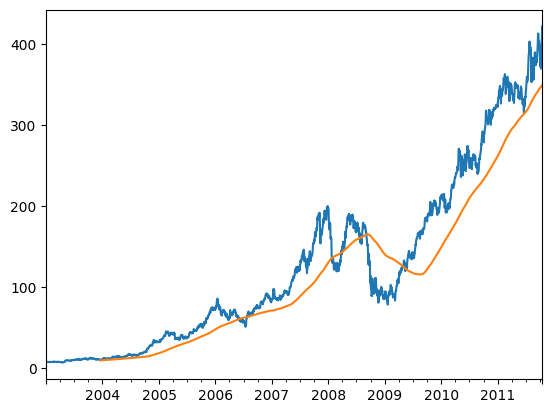

In [156]:
close_px_all = pd.read_csv('pydata-book/examples/stock_px_2.csv', parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL','MSFT','XOM']]

close_px = close_px.resample('B').ffill()

close_px.AAPL.plot()

close_px.AAPL.rolling(250).mean().plot()

In [157]:
aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot: >

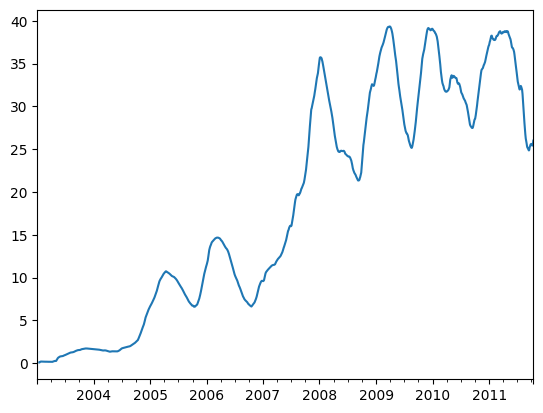

In [158]:
aapl_std250.plot()

<AxesSubplot: >

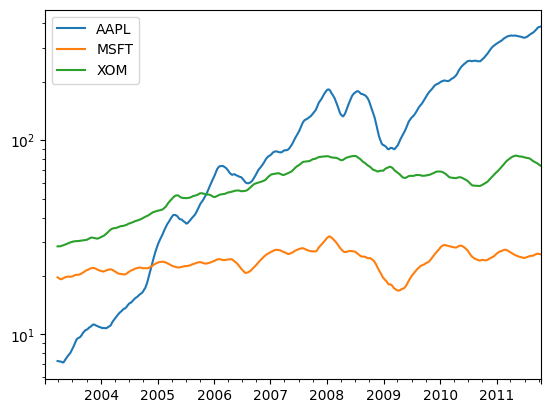

In [159]:
expanding_mean = aapl_std250.expanding().mean()

close_px.rolling(60).mean().plot(logy=True)

In [160]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Funções exponencialmente ponderadas

<AxesSubplot: >

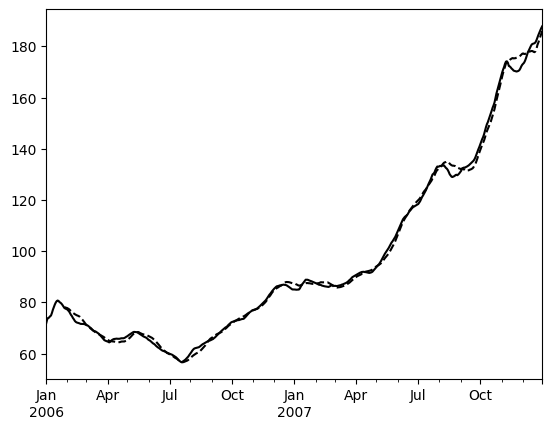

In [162]:
aapl_px = close_px.AAPL['2006':'2007']

ma60 = aapl_px.rolling(30,min_periods=20).mean()

ewma60 = aapl_px.ewm(span=30).mean()

ma60.plot(style='k--',label='Simple MA')

ewma60.plot(style='k-',label='EW MA')

### Funções de janela móvel binárias

<AxesSubplot: >

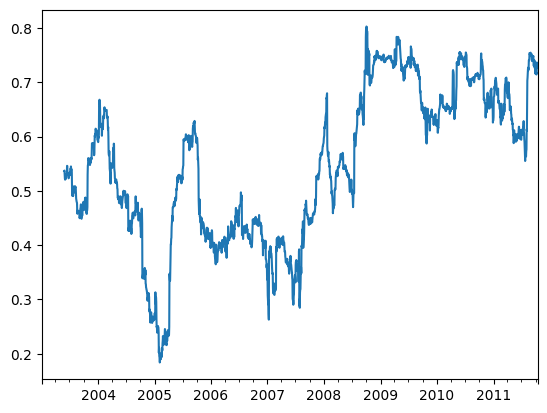

In [165]:
spx_px = close_px_all['SPX']

spx_rets = spx_px.pct_change()

returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

corr.plot() 

<AxesSubplot: >

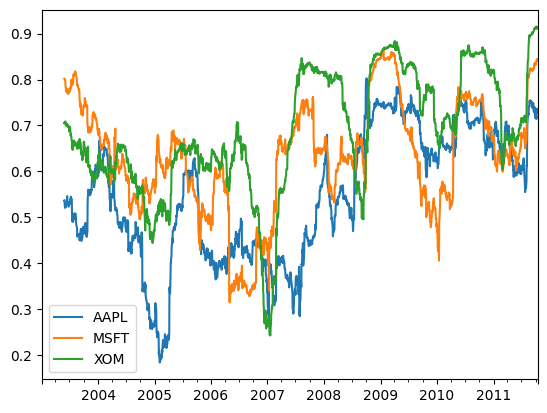

In [166]:
corr = returns.rolling(125,min_periods=100).corr(spx_rets)

corr.plot()

### Funções de janela móvel definidas pelo usuário

<AxesSubplot: >

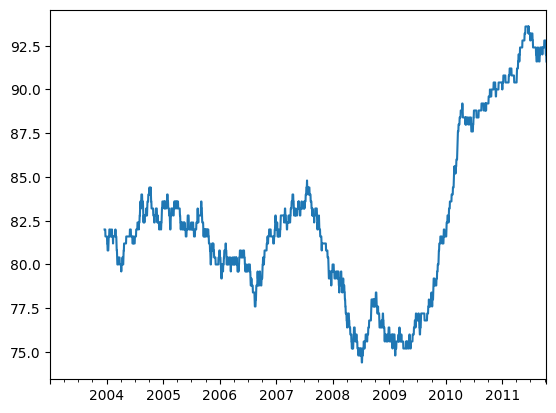

In [167]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)

result.plot()